In [1]:
#Load in the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('cirrhosis.csv')
df.tail()



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [2]:
#Datatypes
print(df.dtypes)


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [3]:
#Percent M/F
females = len(df[df['Sex'] == 'F'])
males = len(df[df['Sex'] == 'M'])
total = len(df)
print(males/total) #11% males
print(females/total) #89% females

0.10526315789473684
0.8947368421052632


In [4]:
#missing values -- Drug, Ascites, Hepatomology, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(col, (missing_values/len(df[col])), 'missing values')

print('12 out of', len(df.columns), 'columns have missing values')

Drug 0.2535885167464115 missing values
Ascites 0.2535885167464115 missing values
Hepatomegaly 0.2535885167464115 missing values
Spiders 0.2535885167464115 missing values
Cholesterol 0.32057416267942584 missing values
Copper 0.2583732057416268 missing values
Alk_Phos 0.2535885167464115 missing values
SGOT 0.2535885167464115 missing values
Tryglicerides 0.3253588516746411 missing values
Platelets 0.02631578947368421 missing values
Prothrombin 0.004784688995215311 missing values
Stage 0.014354066985645933 missing values
12 out of 20 columns have missing values


In [5]:
#Exploring the target variable
print(df['Status'].value_counts())

Status
C     232
D     161
CL     25
Name: count, dtype: int64


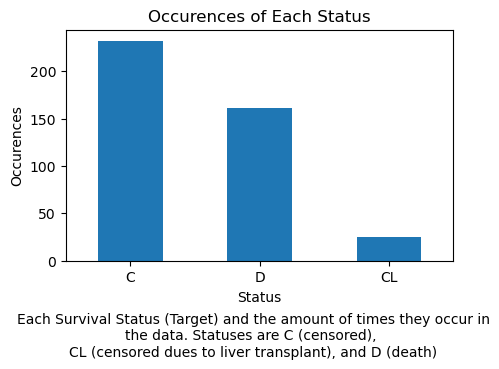

In [6]:
#Status (Target) -- categorical
plt.figure(figsize=(5,3))
pd.value_counts(df['Status']).plot.bar()
plt.title('Occurences of Each Status')
plt.ylabel('Occurences')
plt.xlabel('Status')
txt='''Each Survival Status (Target) and the amount of times they occur in the data. Statuses are C (censored), 
CL (censored dues to liver transplant), and D (death)'''
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [7]:
#Stage -- Ordinal
pd.value_counts(df['Stage'])

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [8]:
df_correct_order = df
correct_order = [1, 2, 3, 4]

pd.value_counts(df_correct_order['Stage']).reindex(correct_order)

Stage
1     21
2     92
3    155
4    144
Name: count, dtype: int64

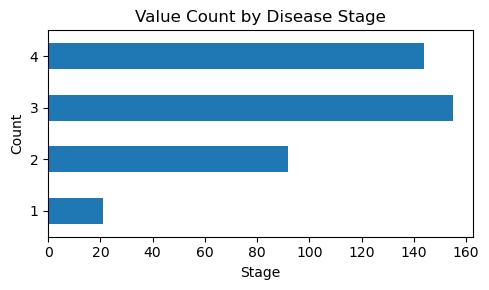

In [9]:
plt.figure(figsize=(5,3))

pd.value_counts(df_correct_order['Stage']).reindex(correct_order).plot.barh()
plt.ylabel('Count')
plt.xlabel('Stage')
plt.title('Value Count by Disease Stage')
plt.tight_layout()
plt.show()

In [10]:
#Platelets -- Continuous
print(df['Platelets'].describe())

count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64


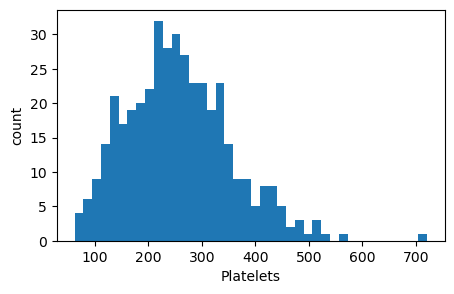

In [11]:
plt.figure(figsize=(5,3))

df['Platelets'].plot.hist(bins = int(2 * np.sqrt(df.shape[0])))
plt.xlabel('Platelets')
plt.ylabel('count')
plt.show()

In [12]:
#Continuous vs. Categorical -- stacked bar plot
count_matrix = df.groupby(['Ascites', 'Status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important -- no instance of CL and Y


Status       C    CL      D
Ascites                    
N        167.0  19.0  102.0
Y          1.0   NaN   23.0
Status          C        CL         D
Ascites                              
N        0.579861  0.065972  0.354167
Y        0.041667       NaN  0.958333


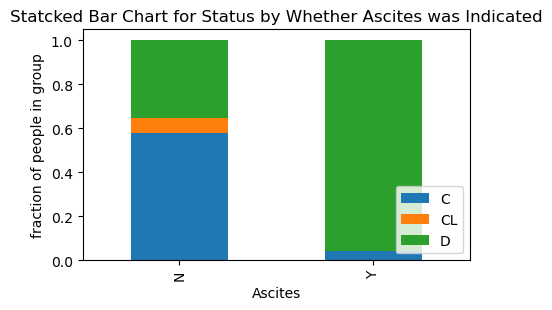

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Ascites was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [14]:
count_matrix = df.groupby(['Hepatomegaly', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status               C        CL         D
Hepatomegaly                              
N             0.710526  0.046053  0.243421
Y             0.375000  0.075000  0.550000


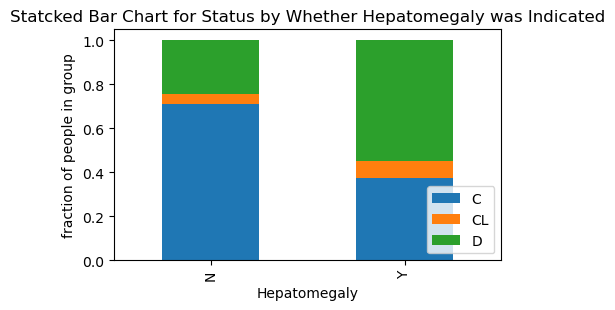

In [15]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Hepatomegaly was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [16]:
count_matrix = df.groupby(['Spiders', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status          C        CL         D
Spiders                              
N        0.608108  0.063063  0.328829
Y        0.366667  0.055556  0.577778


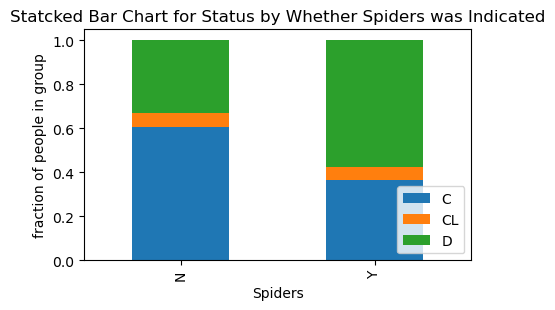

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Spiders was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [18]:
count_matrix = df.groupby(['Edema', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important that there are no instances of CL and Y

Status         C        CL         D
Edema                               
N       0.610169  0.062147  0.327684
S       0.340909  0.068182  0.590909
Y       0.050000       NaN  0.950000


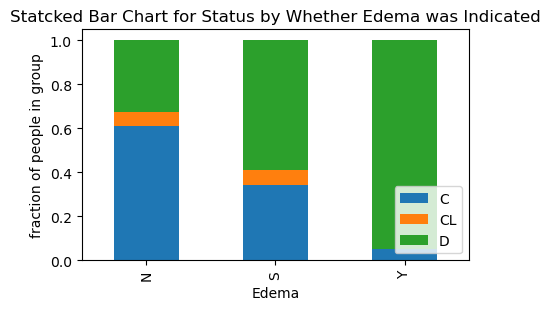

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Statcked Bar Chart for Status by Whether Edema was Indicated')
plt.legend(loc=4)
plt.show()

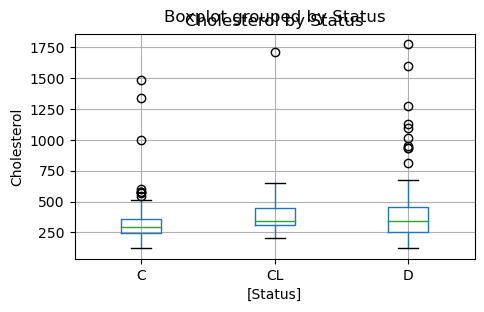

In [20]:
#Continuous vs. Categorical -- hist, box plot, violin
#avoided a category-specific histogram because the target variable has 3 categories
#Billrubin
df[['Cholesterol','Status']].boxplot(by='Status',figsize=(5,3))
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Status')
plt.show() #fix overlap

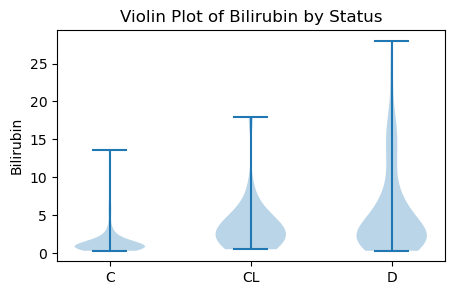

In [21]:
#Violin Plot for Bilirubin
dataset = [df[df['Status']=='C']['Bilirubin'].values,
           df[df['Status']=='CL']['Bilirubin'].values, 
           df[df['Status']=='D']['Bilirubin'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['C','CL', 'D'])
plt.ylabel('Bilirubin')
plt.title('Violin Plot of Bilirubin by Status')
plt.show()

To add with EDA -- fix titles and choose best, continuous versus continuous scatterplot without the target variable, more violin/scatterplots for the rest of the continuous variables, more print outs like descriptions of variables

In [22]:
#Splitting -- since the data is iid, we can use regular 60,20,20 split, but only 25 CL, so we need to use Stratified Kfolds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))


In [23]:
#Check that the lengths of the groups are correct
print(len(X_train))
print(len(X_test))
print(len(X_val))

251
84
83


Make sure to fit_transform the training set, transform the validation and test sets! Check that I did this correctly. And handle missing values in the ordinal and categorical, describe missing values in continuous. Do I encode ID? How about treatment, which I know is extra?

In [24]:
X_train['Stage'].unique()

array([ 3.,  2.,  4., nan,  1.])

In [25]:
df.tail()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,681,2,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,976,0,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


Are discrete values still std_ftrs? Assume they are numerical rather than ordinal

In [26]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)


#Label the features as categorical, ordinal, or continuous

#Preprocess

#Handle missing values in categorical and ordinal


(251, 26)
(83, 26)
(84, 26)


Questions:
- Do we need a val set
- Why is there an ordinal feature still?

In [28]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
num__Cholesterol      0.290837
num__Copper           0.231076
num__Alk_Phos         0.223108
num__SGOT             0.223108
num__Tryglicerides    0.294821
num__Platelets        0.027888
ord__Stage            0.011952
dtype: float64
fraction of points with missing values: 0.30677290836653387


In [29]:
mask = df_test[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets']].isnull()

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) # 6 patterns, we will train 6 models
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

#Only 6 groupings so can def use this!

(6, 6)
[False False False False False False] 47
[False False False False False  True] 1
[False False False False  True False] 1
[ True False False False  True False] 5
[ True  True  True  True  True False] 29
[ True  True  True  True  True  True] 1


In [30]:
# feature_names = (preprocessor.get_feature_names_out())
# # X_train_prep
# print(feature_names)
# df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
# print(df_train['ord__Stage'])

In [31]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

def xgb_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):  #can be any type of model now! Just change to something like log reg or lin reg

    # make into row vectors to avoid an obnoxious sklearn/xgb warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()

    XGB = xgboost.XGBClassifier(n_jobs=1, early_stopping_rounds=50)
    
    # find the best parameter set
    param_grid = {"learning_rate": [0.03],
                  "n_estimators": [10000],
                  "seed": [0],
                  #"reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  "missing": [np.nan], 
                  #"max_depth": [1,3,10,30,100,],
                  "colsample_bytree": [0.9],              
                  "subsample": [0.66]}

    pg = ParameterGrid(param_grid)

    scores = np.zeros(len(pg))

    for i in range(len(pg)):
        if verbose >= 5:
            print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        XGB.set_params(**params)
        eval_set = [(X_CV, y_CV)]
        XGB.fit(X_train, Y_train, eval_set=eval_set, verbose=False)# with early stopping
        y_CV_pred = XGB.predict(X_CV, ntree_limit=XGB.best_ntree_limit)
        scores[i] = f1_score(y_CV,y_CV_pred, average='weighted')

    best_params = np.array(pg)[scores == np.max(scores)]
    if verbose >= 4:
        print('Test set max score and best parameters are:')
        print(np.max(scores))
        print(best_params)

    # test the model on the test set with best parameter set
    XGB.set_params(**best_params[0])
    XGB.fit(X_train,Y_train,eval_set=eval_set, verbose=False)
    y_test_pred = XGB.predict(X_test, ntree_limit=XGB.best_ntree_limit)

    if verbose >= 1:
        print ('The MSE is:',f1_score(y_test,y_test_pred, average='weighted'))
    if verbose >= 2:
        print ('The predictions are:')
        print (y_test_pred)
    if verbose >= 3:
        print("Feature importances:")
        print(XGB.feature_importances_)

    return (f1_score(y_test,y_test_pred, average='weighted'), y_test_pred, XGB.feature_importances_)

# Function: Reduced-feature XGB model
# all the inputs need to be pandas DataFrame
def reduced_feature_model(X_train, Y_train, X_CV, y_CV, X_test, y_test):
    
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    
    print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
                sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        # run model
        sub_y_test_pred = xgb_model(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=0)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        print('   f1 score:',f1_score(sub_y_test,sub_y_test_pred, average='weighted'))

        # collect the test predictions
        all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
        
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
               
    # get global RMSE
    total_f1_score = f1_score(y_test,all_y_test_pred, average='weighted')
    return total_f1_score

In [34]:
#XGBoost
total_f1_score = reduced_feature_model(df_train, y_train, df_CV, y_val, df_test, y_test)
print('final f1 score:', total_f1_score)

there are 8 unique missing value patterns.
working on unique pattern 0


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 0.6999565783760313
working on unique pattern 1


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 1.0
working on unique pattern 2


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 1.0
working on unique pattern 3


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 1.0
working on unique pattern 4


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 0.763956043956044
working on unique pattern 5


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 0.6666666666666666
working on unique pattern 6


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 1.0
working on unique pattern 7


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


   f1 score: 1.0
final f1 score: 0.7491582491582491


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [35]:
# from sklearn.svm import SVC
# # param_grid = {
# #                 'C': [0.1, 1,10,100], # no upper bound so the values are evenly spaced in log
# #                 'gamma': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
# #                 } 

# param_grid = {
#                 'C': [10], # no upper bound so the values are evenly spaced in log
#                 'gamma': [0.75] # linearly spaced because it is between 0 and 1, 0 is omitted
#                 } 

# SVC = SVC(random_state = 42)

# total_f1_score = reduced_feature_model(df_train, y_train, df_CV, y_val, df_test, y_test, SVC, param_grid)
# print('final f1 score:', total_f1_score)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
def MLpipe_StratifiedKFold_f1(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies StratifiedKFold with 4 folds to other. It then uses reduced-features model to deal with missing values.
    The f1 score is maximized in cross-validation. 
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []

    #Number of random states
    nr_states = 10

    #loop through all of the random states
    for k in range(nr_states):
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*k)
        print('test balance:',np.unique(y_test,return_counts=True))


        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*k)
        # for train_index, val_index in kf.split(X_other,y_other):
        #     print('new fold')
        #     X_train = X_other.iloc[train_index]
        #     y_train = y_other.iloc[train_index]
        #     X_CV = X_other.iloc[val_index]
        #     y_CV = y_other.iloc[val_index]
        #     print(np.unique(y_train,return_counts=True))
        #     print(np.unique(y_CV,return_counts=True))

        #create the pipeline
        pipe = make_pipeline(preprocessor,ML_algo)

        # use GridSearchCV
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_score',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        
         # find all unique patterns of missing value in test set
        mask = X_test.isnull()
        unique_rows = np.array(np.unique(mask, axis=0))
        all_y_test_pred = pd.DataFrame()
        
        print('there are', len(unique_rows), 'unique missing value patterns.')
        
        # divide test sets into subgroups according to the unique patterns
        for i in range(len(unique_rows)):
            print ('working on unique pattern', i)
            ## generate X_test subset that matches the unique pattern i
            sub_X_test = pd.DataFrame()
            sub_y_test = pd.Series(dtype=float)
            for j in range(len(mask)): # check each row in mask
                row_mask = np.array(mask.iloc[j])
                if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                    sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
                    sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

            sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
            
            ## choose the according reduced features for subgroups
            sub_X_train = pd.DataFrame()
            sub_Y_train = pd.DataFrame()
            sub_X_CV = pd.DataFrame()
            sub_y_CV = pd.DataFrame()
            # 1.cut the feature columns that have nans in the according sub_X_test
            sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
            sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
            # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
            sub_X_train = sub_X_train.dropna()
            sub_X_CV = sub_X_CV.dropna()   
            # 3.cut the sub_Y_train and sub_y_CV accordingly
            sub_Y_train = y_train.iloc[sub_X_train.index]
            sub_y_CV = y_CV.iloc[sub_X_CV.index]
            
            # run model
            # run the specified model
            grid.fit(sub_X_train, sub_Y_train) #model.fit
            sub_y_test_pred = grid.predict(sub_X_test) #model.fit
            sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)
            print('   f1 score:', f1_score(sub_y_test, sub_y_test_pred, average='weighted'))

            # collect the test predictions
            all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
            
        # rank the final y_test_pred according to original y_test index
        all_y_test_pred = all_y_test_pred.sort_index()
        y_test = y_test.sort_index()
                
        # get global f1 score
        total_f1_score = f1_score(y_test,all_y_test_pred, average='weighted')
        test_scores.append(total_f1_score)
        # #fit all of the models
        # grid.fit(X_other, y_other)
        
        # #save results into a data frame
        # results = pd.DataFrame(grid.cv_results_)
        
        # print('best model parameters:',grid.best_params_)
        # print('validation score:',grid.best_score_) 
        # save the model
        best_models.append(grid)
        # calculate and save the test score
        # y_test_pred = best_models[-1].predict(X_test)
        # test_scores.append(f1_score(y_test,y_test_pred, squared=False)) 
        # print('test score:',test_scores[i])




    return test_scores, best_models

In [33]:
from sklearn.svm import SVC
# param_grid = {
#                 'C': [0.1, 1,10,100], # no upper bound so the values are evenly spaced in log
#                 'gamma': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
#                 } 

param_grid = {
                  'C': [0.1, 1,10,100], # no upper bound so the values are evenly spaced in log
                  'gamma': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                  } 

svc = SVC(random_state = 42)

test_scores, best_models = MLpipe_StratifiedKFold_f1(X, y, preprocessor, svc, param_grid)
print('the test scores for linear regression with an elastic net are:', test_scores)
print('The mean of the test scores is:', np.mean(test_scores))
print('The standard deviation of the test scores is:', np.std(test_scores))

test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
there are 6 unique missing value patterns.
working on unique pattern 0


IndexError: positional indexers are out-of-bounds

In [38]:
# def generalized_reduced_feature_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, model):
    
#     # find all unique patterns of missing value in test set
#     mask = X_test.isnull()
#     unique_rows = np.array(np.unique(mask, axis=0))
#     all_y_test_pred = pd.DataFrame()
    
#     print('there are', len(unique_rows), 'unique missing value patterns.')
    
#     # divide test sets into subgroups according to the unique patterns
#     for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
#         ## generate X_test subset that matches the unique pattern i
#         sub_X_test = pd.DataFrame()
#         sub_y_test = pd.Series(dtype=float)
#         for j in range(len(mask)): # check each row in mask
#             row_mask = np.array(mask.iloc[j])
#             if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

#                 sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
#                 sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

#         sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
#         ## choose the according reduced features for subgroups
#         sub_X_train = pd.DataFrame()
#         sub_Y_train = pd.DataFrame()
#         sub_X_CV = pd.DataFrame()
#         sub_y_CV = pd.DataFrame()
#         # 1.cut the feature columns that have nans in the according sub_X_test
#         sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
#         sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
#         # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
#         sub_X_train = sub_X_train.dropna()
#         sub_X_CV = sub_X_CV.dropna()   
#         # 3.cut the sub_Y_train and sub_y_CV accordingly
#         sub_Y_train = Y_train.iloc[sub_X_train.index]
#         sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
#         # run model
#         # run the specified model
#         model.fit(sub_X_train, sub_Y_train)
#         sub_y_test_pred = model.predict(sub_X_test)
#         sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)
#         print('   f1 score:', f1_score(sub_y_test, sub_y_test_pred, average='weighted'))

#         # collect the test predictions
#         all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
        
#     # rank the final y_test_pred according to original y_test index
#     all_y_test_pred = all_y_test_pred.sort_index()
#     y_test = y_test.sort_index()
               
#     # get global RMSE
#     total_f1_score = f1_score(y_test,all_y_test_pred, average='weighted')
#     return total_f1_score

In [39]:
# #Trying other models
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import f1_score
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC

# def MLpipe_StratKFold_F1(X_train, y_train, X_test, y_test, preprocessor, ML_algo, param_grid):
#     '''
#     This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
#     The RMSE is minimized in cross-validation.

#     You should:

#     1. Loop through 10 different random states
#     2. Split your data 
#     3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
#     4. Calculate the model's error on the test set 
#     5. Return a list of 10 test scores and 10 best models 
#     '''
    
#     # lists to be returned 
#     test_scores = []
#     best_models = []

#     # your code here...

#     #Number of random states
#     nr_states = 10

#     #loop through all of the random states
#     for i in range(nr_states):

#         #4 folds
#         skf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

#         #create the pipeline
#         pipe = make_pipeline(preprocessor,ML_algo)

#         # use GridSearchCV
#         print("GRID SEARCH CV 1")
#         grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1',
#                             cv=skf, return_train_score = True, n_jobs=-1, verbose=True)
#         print("GRID SEARCH CV 2")
#         print("GRID", grid)

#         #fit all of the models
#         grid.fit(X_train, y_train)
        
#         # print('best model parameters:',grid.best_params_)
#         # print('validation score:',grid.best_score_) 
#         # save the model
#         best_models.append(grid)
#         # calculate and save the test score
#         y_test_pred = best_models[-1].predict(X_test)
#         test_scores.append(f1_score(y_test,y_test_pred, average='weighted')) 
#         # print('test score:',test_scores[i])



#     return (f1_score(y_test,y_test_pred, average='weighted'), y_test_pred)
#     # return test_scores, best_models

In [40]:
# def reduced_feature_model_misc(X_train, Y_train, X_CV, y_CV, X_test, y_test, preprocessor, ML_algo, param_grid):
    
#     # find all unique patterns of missing value in test set
#     mask = X_test.isnull()
#     unique_rows = np.array(np.unique(mask, axis=0))
#     all_y_test_pred = pd.DataFrame()
    
#     print('there are', len(unique_rows), 'unique missing value patterns.')
    
#     # divide test sets into subgroups according to the unique patterns
#     for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
#         ## generate X_test subset that matches the unique pattern i
#         sub_X_test = pd.DataFrame()
#         sub_y_test = pd.Series(dtype=float)
#         for j in range(len(mask)): # check each row in mask
#             row_mask = np.array(mask.iloc[j])
#             if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

#                 sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
#                 sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

#         sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
#         ## choose the according reduced features for subgroups
#         sub_X_train = pd.DataFrame()
#         # sub_Y_train = pd.DataFrame()
#         sub_X_CV = pd.DataFrame()
#         # sub_y_CV = pd.DataFrame()
#         # 1.cut the feature columns that have nans in the according sub_X_test
#         sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
#         sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
#         # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
#         sub_X_train = sub_X_train.dropna()
#         sub_X_CV = sub_X_CV.dropna()   

#         # 3.cut the sub_Y_train and sub_y_CV accordingly
#         train_indices = (sub_X_train.index)
#         CV_indices = (sub_X_train.index)

#         sub_Y_train = Y_train.iloc[np.argsort(train_indices)]
#         # sub_y_CV = y_CV.iloc[np.argsort(CV_indices)]
#         # print("Worked!")

#         # sub_Y_train = [Y_train[i] for i in train_indices]
#         # sub_y_CV = [y_CV[i] for i in CV_indices]

#         # sub_Y_train = Y_train.iloc[sub_X_train.index] #error is here
#         # sub_y_CV = y_CV.iloc[sub_X_CV.index]  
        
#         # run model
#         sub_y_test_pred = MLpipe_StratKFold_F1(sub_X_train, sub_Y_train, sub_X_test, sub_y_test, preprocessor, ML_algo, param_grid)
#         sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
#                                           index=sub_y_test.index)
#         print('   f1 score:',f1_score(sub_y_test,sub_y_test_pred, average='weighted'))
        
#         # collect the test predictions
#         all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
        
#     # rank the final y_test_pred according to original y_test index
#     all_y_test_pred = all_y_test_pred.sort_index()
#     y_test = y_test.sort_index()
               
#     # get global RMSE
#     total_f1 = f1_score(y_test,all_y_test_pred, average='weighted')
#     return total_f1

In [41]:
# from sklearn.svm import SVC

# f1_scores = []
# nr_states = 10
# param_grid = {
#                   'svc__C': [0.1, 1,10,100], # no upper bound so the values are evenly spaced in log
#                   'svc__gamma': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
#                   } 

# #loop through all of the random states
# for i in range(nr_states):
#     svc = SVC(random_state=42*i)
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)


#     kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
#     for train_index, val_index in kf.split(X_other,y_other):
#         print('new fold')
#         X_train = X_other.iloc[train_index]
#         y_train = y_other.iloc[train_index]
#         X_val = X_other.iloc[val_index]
#         y_val = y_other.iloc[val_index]
#         print(np.unique(y_train,return_counts=True))
#         print(np.unique(y_val,return_counts=True))
#         totat_f1_score = reduced_feature_model_misc(X_train, y_train, X_val, y_val, X_test, y_test, preprocessor, svc, param_grid)
#         f1_scores.append(total_f1_score)
        

    

In [120]:


# def run_svc_with_preprocessing(X, y, n_splits=5, max_iter=10):
#     # Specify feature groups
#     ordinal_ftrs = ['Stage']
#     ordinal_cats = [[1., 2., 3., 4.]]
#     onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
#     std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

#     # Define preprocessing steps for numerical and categorical features separately
#     numerical_transformer = Pipeline(steps=[
#         ('imputer', IterativeImputer(max_iter=max_iter, tol=1e-3)), #estimator = RandomForestRegressor(), random_state=42,
#         ('scaler', StandardScaler())])

#     categorical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

#     ordinal_transformer = Pipeline(steps=[
#         ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#         ('ordinal', OrdinalEncoder(categories=ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))
#     ])

#     # Combine transformers using ColumnTransformer
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numerical_transformer, std_ftrs),
#             ('cat', categorical_transformer, onehot_ftrs),
#             ('ord', ordinal_transformer, ordinal_ftrs)])

#     # Initialize StratifiedKFold
#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     # Create Support Vector Classifier
#     svc = SVC(random_state=42)

#     # Define parameter grid for hyperparameter tuning
#     param_grid = {
#         'classifier__C': [0.1, 1, 10],
#         'classifier__kernel': ['linear', 'rbf', 'poly'],
#         'classifier__gamma': ['scale', 'auto'],
#     }

#     # Create a scorer for f1_score
#     f1_scorer = make_scorer(f1_score)

#     # Create GridSearchCV object with preprocessing
#     grid_search = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svc)]), param_grid, cv=skf, scoring=f1_scorer)

#     # Store f1 scores for each fold
#     f1_scores = []

#     # Iterate through each fold
#     for train_index, test_index in skf.split(X, y):
#         # Split data into training and testing sets
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Fit the GridSearchCV object on training data
#         grid_search.fit(X_train, y_train)

#         # Get the best estimator from hyperparameter tuning
#         best_estimator = grid_search.best_estimator_

#         # Predict on the test set
#         y_pred = best_estimator.predict(X_test)

#         # Calculate f1 score and store it
#         f1 = f1_score(y_test, y_pred)
#         f1_scores.append(f1)

#     # Calculate the mean f1 score across all folds
#     mean_f1 = np.mean(f1_scores)

#     return mean_f1, grid_search.best_params_

In [121]:
# # Example usage:
# # Assuming X is your feature matrix, y is your target variable
# mean_f1, best_params = run_svc_with_preprocessing(X, y)
# print(f"Mean F1 Score: {mean_f1}")
# print(f"Best Hyperparameters: {best_params}")

In [87]:
# Specify the column and drop rows with NaN in that column
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42), random_state=42))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)



test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))


(251, 26)
(83, 26)
(84, 26)


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [88]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
ord__Stage    0.011952
dtype: float64
fraction of points with missing values: 0.01195219123505976


In [86]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

print(df_train[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

# imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=42)
# # imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)

# #Linear regression is deterministic so the imputed values do not change when you rerun the code. 
# # This is bad because you will not be able to assess how uncertainty of imputation impacts the predictive power of your models.

# X_impute = imputer.fit_transform(df_train)
# df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)

# print(df_train_imp[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

# df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
# df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)

     num__Cholesterol  num__Copper  num__Alk_Phos  num__SGOT  \
246          0.619609     0.109846       4.132692  -0.358540   
247         -0.555868    -1.002221      -0.577644  -0.995654   
248         -0.346326    -0.540831      -0.447138   0.042106   
249         -0.126563    -0.446187      -0.306627   0.956209   
250         -0.566089    -0.564492      -0.373017  -0.989947   

     num__Tryglicerides  num__Platelets  ord__Stage  
246           -0.952619        1.014308         3.0  
247            0.097430        0.483233         1.0  
248           -1.194938        0.789622         1.0  
249            1.571536       -0.201037         2.0  
250           -0.306435       -1.814687         3.0  


In [119]:
#Really good attempt at it

# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# import warnings
# warnings.filterwarnings("ignore")

# df = pd.read_csv('cirrhosis.csv')
# df.tail()

# df = df.drop(['ID'], axis=1) #ID is superfluous
# df = df.drop(['Drug'], axis=1)
# # df = df.replace('NA', np.nan)
# column_to_check = 'Stage'
# df.dropna(subset=[column_to_check], inplace=True)


# # Define the mapping of values to be replaced
# replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# # Use the replace method to replace values in the specified column
# df['Status'] = df['Status'].replace(replacement_map)

# random_state = 42

# y = df['Status']

# X = df.loc[:, df.columns != 'Status'] 


# # X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
# # print('test balance:',np.unique(y_test,return_counts=True))


# # kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
# # for train_index, val_index in kf.split(X_other,y_other):
# #     print('new fold')
# #     X_train = X_other.iloc[train_index]
# #     y_train = y_other.iloc[train_index]
# #     X_val = X_other.iloc[val_index]
# #     y_val = y_other.iloc[val_index]
# #     print(np.unique(y_train,return_counts=True))
# #     print(np.unique(y_val,return_counts=True))


# #Now need to process the categorical, ordinal, and numerical variables
# ordinal_ftrs = ['Stage'] 
# ordinal_cats = [[ 1.,  2.,  3., 4.]]
# onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# # one-hot encoder -- categorical
# # Make the missing values categories

# param_grid = {
#         'svc__C': [0.1, 1, 10],
#         'svc__gamma': ['scale', 'auto'],
#     }

# nr_states = 3
# test_scores_svc = np.zeros(nr_states)
# final_models = []

# for i in range(nr_states):
#     # first split to separate out the test set
#     # we will use kfold on other
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

#     categorical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
#         ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

#     # ordinal encoder
#     #Make the missing values categories
#     ordinal_transformer = Pipeline(steps=[
#         ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#         ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

#         # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
#         ])

#     # standard scaler
#     numeric_transformer = Pipeline(steps=[
#         ('scaler', StandardScaler()), 
#         ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42*i), random_state=42*i))])


#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numeric_transformer, std_ftrs),
#             ('cat', categorical_transformer, onehot_ftrs),
#             ('ord', ordinal_transformer, ordinal_ftrs)])
#     # splitter for other
#     kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
#     # the classifier
#     clf = SVC(random_state = 42*i) # initialize the classifier

#     # let's put together a pipeline
#     # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
#     # then it will train the ML algorithm on the training set and evaluate it on the validation set
#     # it repeats this step automatically such that each fold will be an evaluation set once
#     pipe = make_pipeline(preprocessor,clf)

#     # use GridSearchCV
#     # GridSearchCV loops through all parameter combinations and collects the results 
#     grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
#                         cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
#     # this line actually fits the model on other
#     grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
#     # save results into a data frame. feel free to print it and inspect it
#     results_svc = pd.DataFrame(grid.cv_results_)
#     #print(results)

#     print('best model parameters:',grid.best_params_)
#     print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
#     # save the model
#     final_models.append(grid)
#     # calculate and save the test score
#     y_test_pred = final_models[-1].predict(X_test)
#     test_scores_svc[i] = accuracy_score(y_test,y_test_pred)
#     # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
#     print('test score:',test_scores_svc[i])

# print(test_scores_svc)




In [125]:
#Final Example

# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# import warnings
# warnings.filterwarnings("ignore")
# import numpy as np
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.svm import SVC
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer, SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import make_scorer, f1_score

# df = pd.read_csv('cirrhosis.csv')
# df.tail()

# df = df.drop(['ID'], axis=1) #ID is superfluous
# df = df.drop(['Drug'], axis=1)
# # df = df.replace('NA', np.nan)
# column_to_check = 'Stage'
# df.dropna(subset=[column_to_check], inplace=True)


# # Define the mapping of values to be replaced
# replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# # Use the replace method to replace values in the specified column
# df['Status'] = df['Status'].replace(replacement_map)

# random_state = 42

# y = df['Status']

# X = df.loc[:, df.columns != 'Status'] 


# # X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
# # print('test balance:',np.unique(y_test,return_counts=True))


# # kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
# # for train_index, val_index in kf.split(X_other,y_other):
# #     print('new fold')
# #     X_train = X_other.iloc[train_index]
# #     y_train = y_other.iloc[train_index]
# #     X_val = X_other.iloc[val_index]
# #     y_val = y_other.iloc[val_index]
# #     print(np.unique(y_train,return_counts=True))
# #     print(np.unique(y_val,return_counts=True))


# #Now need to process the categorical, ordinal, and numerical variables
# ordinal_ftrs = ['Stage'] 
# ordinal_cats = [[ 1.,  2.,  3., 4.]]
# onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# # one-hot encoder -- categorical
# # Make the missing values categories

# param_grid = {
#         'svc__C': [0.1, 1, 10],
#         'svc__gamma': ['scale', 'auto'],
#     }

# nr_states = 3
# test_scores_svc = []
# final_models = []
# for j in range(nr_states):
#     categorical_transformer = Pipeline(steps=[
#             ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
#             ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

#     # ordinal encoder
#     #Make the missing values categories
#     ordinal_transformer = Pipeline(steps=[
#         ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#         ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

#         # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
#         ])

#     # standard scaler
#     numeric_transformer = Pipeline(steps=[
#         ('scaler', StandardScaler()), 
#         ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42*j), max_iter=20, random_state=42*j))])


#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numeric_transformer, std_ftrs),
#             ('cat', categorical_transformer, onehot_ftrs),
#             ('ord', ordinal_transformer, ordinal_ftrs)])
#     for i in range(nr_states):
#         # first split to separate out the test set
#         # we will use kfold on other
#         X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

#         # splitter for other
#         kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
#         # the classifier
#         clf = SVC(random_state = 42*i) # initialize the classifier

#         # let's put together a pipeline
#         # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
#         # then it will train the ML algorithm on the training set and evaluate it on the validation set
#         # it repeats this step automatically such that each fold will be an evaluation set once
#         pipe = make_pipeline(preprocessor,clf)

#         # use GridSearchCV
#         # GridSearchCV loops through all parameter combinations and collects the results 
#         grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
#                             cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
#         # this line actually fits the model on other
#         grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
#         # save results into a data frame. feel free to print it and inspect it
#         results_svc = pd.DataFrame(grid.cv_results_)
#         #print(results)

#         print('best model parameters:',grid.best_params_)
#         print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
#         # save the model
#         final_models.append(grid)
#         # calculate and save the test score
#         y_test_pred = final_models[-1].predict(X_test)
#         test_scores_svc.append(accuracy_score(y_test,y_test_pred))
#         # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
#         print('test score:',test_scores_svc[i])

# print('list of test scores:', test_scores_svc)
# print('The mean of the test scores is:', np.mean(test_scores_svc))
# print('The standard deviation of the test scores is:', np.std(test_scores_svc))


In [126]:
# results_svc

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, f1_score

df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories

def StratKFoldAccScore(X, y, ML_Algo, param_grid):
    nr_states = 5
    test_scores = []
    final_models = []
    for j in range(nr_states):
        categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

        # ordinal encoder
        #Make the missing values categories
        ordinal_transformer = Pipeline(steps=[
            ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
            ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

            # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
            ])

        # standard scaler
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler()), 
            ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42*j), max_iter=20, random_state=42*j))])


        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, std_ftrs),
                ('cat', categorical_transformer, onehot_ftrs),
                ('ord', ordinal_transformer, ordinal_ftrs)])
        for i in range(nr_states):
            # first split to separate out the test set
            # we will use kfold on other
            X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

            # splitter for other
            kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

            
            # let's put together a pipeline
            # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
            # then it will train the ML algorithm on the training set and evaluate it on the validation set
            # it repeats this step automatically such that each fold will be an evaluation set once
            pipe = make_pipeline(preprocessor,ML_Algo)

            # use GridSearchCV
            # GridSearchCV loops through all parameter combinations and collects the results 
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                                cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            
            # this line actually fits the model on other
            grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
            # save results into a data frame. feel free to print it and inspect it
            results = pd.DataFrame(grid.cv_results_)
            #print(results)

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            y_test_pred = final_models[-1].predict(X_test)
            test_scores.append(accuracy_score(y_test,y_test_pred))
            # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
            print('test score:',test_scores[i])
        return test_scores, final_models


In [133]:
param_grid = {
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': ['scale', 'auto'],
    }

clf = SVC(max_iter=10000, random_state=42)

svc_test_scores, svc_final_models = StratKFoldAccScore(X, y, clf, param_grid)

print('list of test scores:', svc_test_scores)
print('The mean of the test scores is:', np.mean(svc_test_scores))
print('The standard deviation of the test scores is:', np.std(svc_test_scores))

#Best model for accuracy is the second one! 


Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7537099617984131
test score: 0.7469879518072289
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7143696738172202
test score: 0.8674698795180723
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'auto'}
validation score: 0.766015280634734
test score: 0.6626506024096386
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 0.1, 'svc__gamma': 'scale'}
validation score: 0.7263076697032032
test score: 0.7590361445783133
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
validation score: 0.7385395239494563
test score: 0.8072289156626506
list of test scores: [0.7469879518072289, 0.8674698795180723, 0.6626506024096386, 0.7590361445783133, 0.8072289156626506]
The mean of the test scores is: 0.7686746987951807
The standard deviation of the test scores is: 0.06789880869207408


In [135]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldAccScore(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7751983543931824
test score: 0.7349397590361446
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 1.0}
validation score: 0.7356744049368205
test score: 0.891566265060241
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.7720761093153099
test score: 0.7228915662650602
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.75}
validation score: 0.7477593300029386
test score: 0.7590361445783133
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7751248898031149
test score: 0.8433734939759037
list of test scores: [0.7349397590361446, 0.891566265060241, 0.7228915662650602, 0.7590361445783133, 0.8433734939759037]
The mean of the test scores is: 0.7903614457831326
The standard deviation of the test scores is: 0.06581445919878391


In [136]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2', 'none']
}

clf = LogisticRegression(max_iter=10000, random_state=42)

lr_test_scores, lr_final_models = StratKFoldAccScore(X, y, clf, param_grid_lr)

print('list of test scores:', lr_test_scores)
print('The mean of the test scores is:', np.mean(lr_test_scores))
print('The standard deviation of the test scores is:', np.std(lr_test_scores))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7539303555686159
test score: 0.7228915662650602
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7083088451366442
test score: 0.8674698795180723
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7750881575080812
test score: 0.6746987951807228
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7354540111666177
test score: 0.7590361445783133
Fitting 4 folds for each of 18 candidates, totalling 72 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7447105495151336
test score: 0.7710843373493976
list of test scores: [0.7228915662650602, 0.8674698795180723, 0.6746987951807228, 0.7590361445783133, 0.7710843373493976]
The mean of the test scores is: 0.7590361445783133
The standard deviation of the test scores is: 0.06375304364011064


In [138]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7],
    "xgbclassifier__reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    "xgbclassifier__reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]
}

clf_xgb = XGBClassifier(random_state=42)

xgb_test_scores, xgb_best_model = StratKFoldAccScore(X, y, clf_xgb, param_grid_xgb)

print('List of test scores:', xgb_test_scores)
print('The mean of the test scores is:', np.mean(xgb_test_scores))
print('The standard deviation of the test scores is:', np.std(xgb_test_scores))

Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 1.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.7903687922421392
test score: 0.7590361445783133
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 0.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.723479282985601
test score: 0.8554216867469879
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 100.0}
validation score: 0.7842712312665296
test score: 0.7228915662650602
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 10.0}
validation score: 0.7568689391713195
test score: 0.7831325301204819
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping crite

best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 10.0, 'xgbclassifier__reg_lambda': 1.0}
validation score: 0.7689905965324713
test score: 0.7951807228915663
List of test scores: [0.7590361445783133, 0.8554216867469879, 0.7228915662650602, 0.7831325301204819, 0.7951807228915663]
The mean of the test scores is: 0.783132530120482
The standard deviation of the test scores is: 0.04377325813152999


### Questions
- Should there still be missing values showing up after using GridSearchCV since it isn't modding the data itself? is there a way to make sure that the missing values are being handled?
    
- Getting f1 score to work:
    - Wanna use weighted cuz classification is imbalanced
    - works for accuracy score!
    - how do I get this to work with f1 given multiclass

- ASK: Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances).


- help with the convergence warnings

- Look at how to determine which final model to select. Just select model that corresponds to highest score?

- Have to make sure results are reproduceable?